# Import Required Libraries
Import the necessary libraries, including pandas, numpy, sklearn, and matplotlib.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Diabetes Dataset
Load the diabetes dataset using pandas and display the first few rows.

In [2]:
# Load the Diabetes Dataset
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Exploratory Data Analysis

# 1. Display the first 5 rows of the dataframe
print("First 5 rows of the dataframe:")
print(diabetes_df.head())

# 2. Display the number of rows and columns in the dataframe
print("\nNumber of rows and columns in the dataframe:")
print(diabetes_df.shape)

# 3. Display the data types of each column
print("\nData types of each column:")
print(diabetes_df.dtypes)

# 4. Display the number of missing values in each column
print("\nNumber of missing values in each column:")
print(diabetes_df.isnull().sum())

# 5. Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(diabetes_df.nunique())

First 5 rows of the dataframe:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Number of rows and columns in the dataframe:
(768, 9)

Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI      

In [17]:
import pandasql as psql

# Query to get the 10 highest BMI records
query = "SELECT * FROM diabetes_df ORDER BY BMI DESC LIMIT 10"
highest_bmi_records = psql.sqldf(query, locals())

# Display the result
print(highest_bmi_records)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      129            110             46      130  67.1   
1            0      180             78             63       14  59.4   
2            3      123            100             35      240  57.3   
3            1       88             30             42       99  55.0   
4            0      162             76             56      100  53.2   
5            5      115             98              0        0  52.9   
6           11      135              0              0        0  52.3   
7            0      165             90             33      680  52.3   
8            7      152             88             44        0  50.0   
9            1      122             90             51      220  49.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.319   26        1  
1                     2.420   25        1  
2                     0.880   22        0  
3                     0.496   2

# Split the Dataset into Training and Testing Sets
Use sklearn's train_test_split to split the dataset into training and testing sets.

In [4]:
# Split the Dataset into Training and Testing Sets
X = diabetes_df.drop('Outcome', axis=1)  # Features
y = diabetes_df['Outcome']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

# Train a Decision Tree Classifier
Train a Decision Tree Classifier using the training set.

In [5]:
# Train a Decision Tree Classifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Evaluate the Model
Evaluate the model using the testing set and print the accuracy score.

In [6]:
# Evaluate the Model

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Visualize the Decision Tree
Visualize the trained Decision Tree using matplotlib and sklearn's plot_tree function.

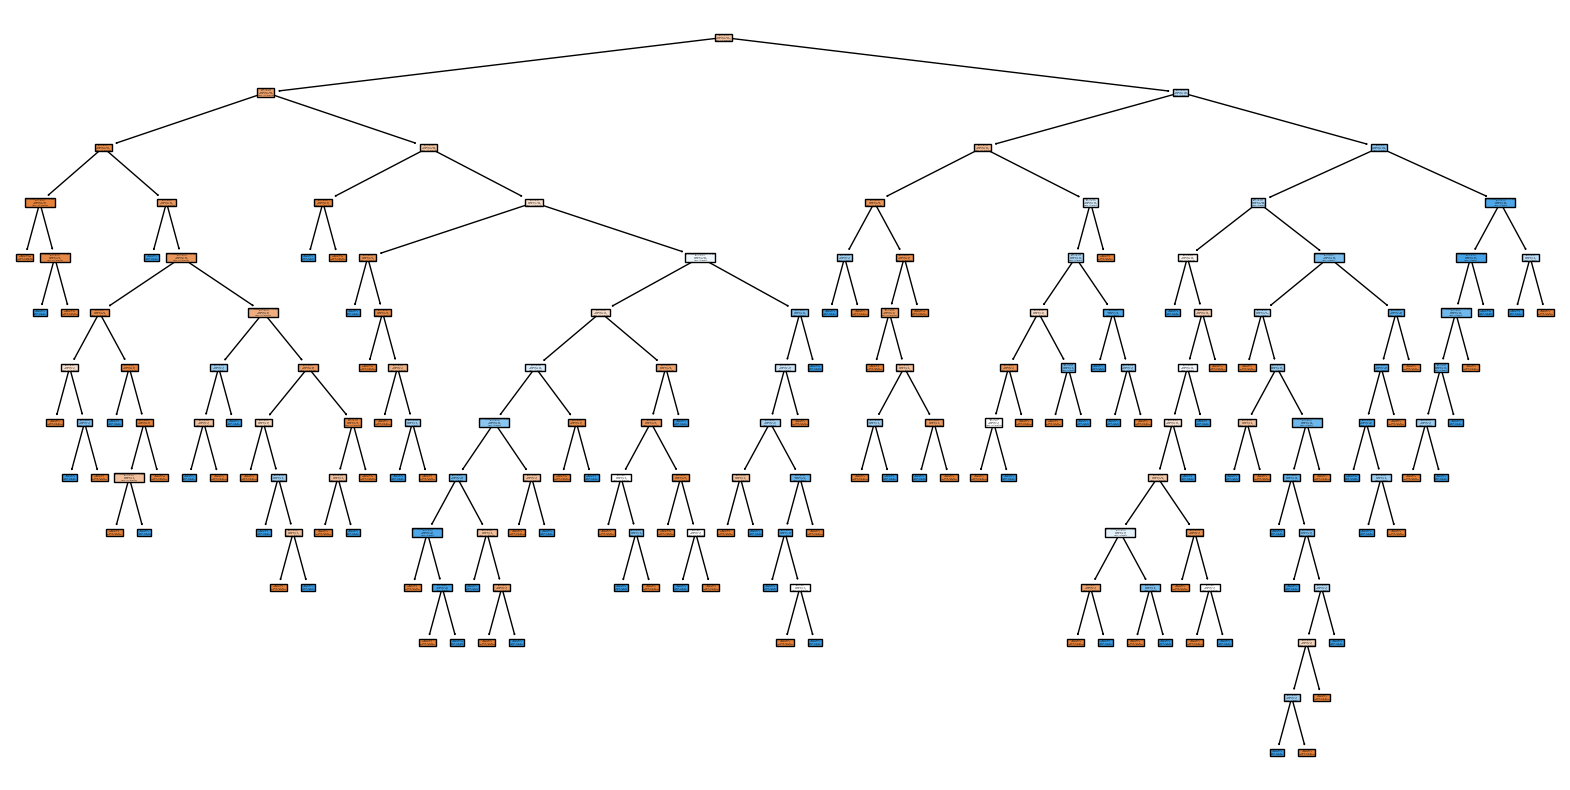

In [7]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree

# Set the size of the plot
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)

# Display the plot
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training set
rf_clf.fit(X_train, y_train)

# Predict the labels for the test set
rf_y_pred = rf_clf.predict(X_test)

# Evaluate the classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

# Print the evaluation results
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print('Random Forest Classification Report:')
print(rf_report)

Random Forest Accuracy: 0.72
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training set
log_reg.fit(X_train, y_train)

# Predict the labels for the test set
log_reg_y_pred = log_reg.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_report = classification_report(y_test, log_reg_y_pred)

# Print the evaluation results
print(f'Logistic Regression Accuracy: {log_reg_accuracy:.2f}')
print('Logistic Regression Classification Report:')
print(log_reg_report)

Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [14]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store the results
results = {}

# Define the k-fold cross-validation
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Train and evaluate each model using cross-validation
for name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_prob = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1] if hasattr(model, "predict_proba") else cross_val_predict(model, X, y, cv=kf, method='decision_function')
    
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_prob)
    
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    }

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                     Precision    Recall  F1-Score       AUC
Decision Tree         0.562044  0.574627  0.568266  0.667313
Random Forest         0.678112  0.589552  0.630739  0.823228
Logistic Regression   0.717593  0.578358  0.640496  0.829470
SVM                   0.723757  0.488806  0.583519  0.812228
K-Nearest Neighbors   0.593886  0.507463  0.547284  0.735194
Gradient Boosting     0.686957  0.589552  0.634538  0.827948


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


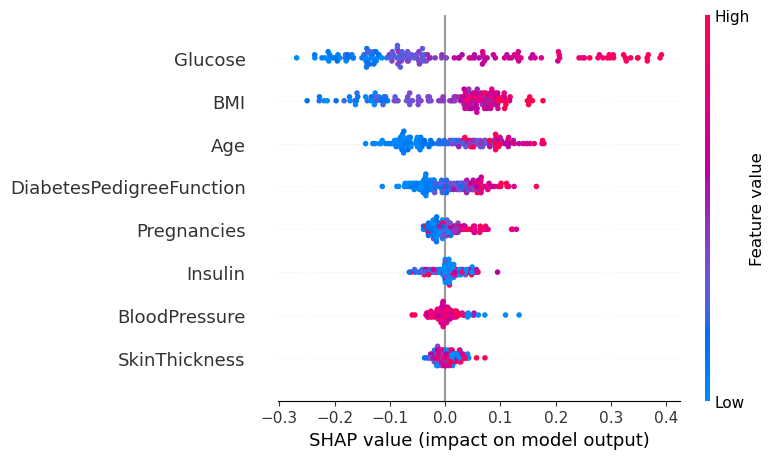

In [15]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

# Summary plot of SHAP values
shap.summary_plot(shap_values[1], X_test)